In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [18]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [19]:
final_list = []
quarter = list(data["Quarter"])
for qtr in quarter :
    if qtr[0:2] == "Q1":
        qtr = "03"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q2":
        qtr = "06"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q3":
        qtr = "09"+qtr[2:]
        final_list.append(qtr)
    elif qtr[0:2] == "Q4":
        qtr = "12"+qtr[2:]
        final_list.append(qtr)
data["Quarters"] = final_list
data.head()

,Quarter,Sales,Quarters
0,Q1_86,1734.827000,03_86
1,Q2_86,2244.960999,06_86
2,Q3_86,2533.804993,09_86
3,Q4_86,2154.962997,12_86
4,Q1_87,1547.818996,03_87


In [20]:
data = data.drop("Quarter", axis=1)
data.head()

,Sales,Quarters
0,1734.827000,03_86
1,2244.960999,06_86
2,2533.804993,09_86
3,2154.962997,12_86
4,1547.818996,03_87


In [21]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     42 non-null     float64
 1   Quarters  42 non-null     object 
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


Sales       0
Quarters    0
dtype: int64

In [22]:
data["Quarters"] = pd.to_datetime(data["Quarters"], format="%m_%y")

In [23]:
data.head()

,Sales,Quarters
0,1734.827000,1986-03-01
1,2244.960999,1986-06-01
2,2533.804993,1986-09-01
3,2154.962997,1986-12-01
4,1547.818996,1987-03-01


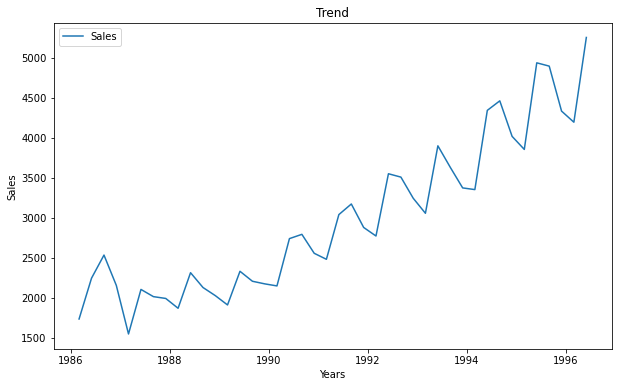

In [24]:
fig = plt.subplots(figsize=(10,6))
plt.plot(data["Quarters"], data["Sales"], label="Sales")
plt.title("Trend")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.legend()

Text(0.5, 1.0, 'Quarterlly Distribution of Sales')

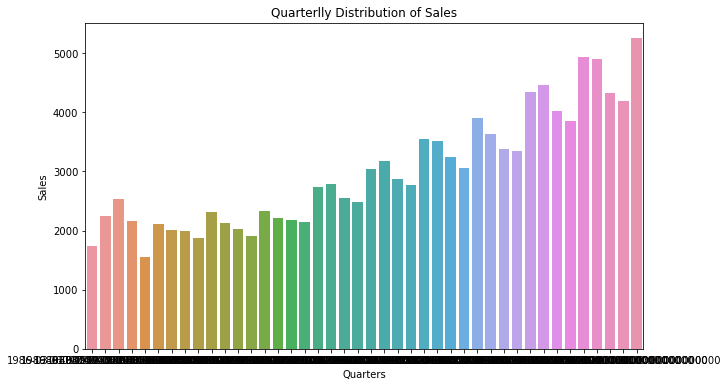

In [25]:
fig = plt.subplots(figsize=(10,6))
sns.barplot(x=data["Quarters"], y=data["Sales"])
plt.title("Quarterlly Distribution of Sales")

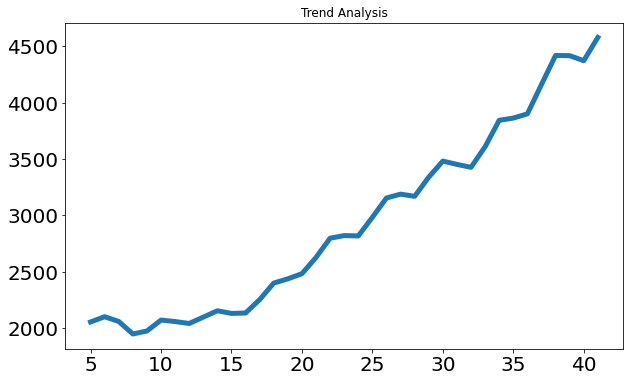

In [26]:
data["Sales"].rolling(6).mean().plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title("Trend Analysis")
plt.show()

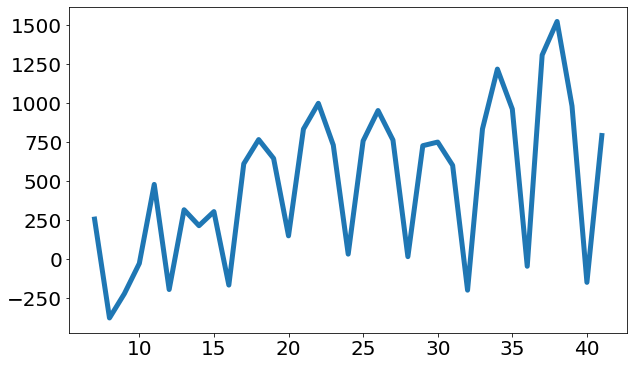

In [27]:
data["Sales"].diff(periods=7).plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.show()

In [28]:
data["month"] = data.Quarters.dt.strftime("%b")

In [29]:
data.head()

,Sales,Quarters,month
0,1734.827000,1986-03-01,Mar
1,2244.960999,1986-06-01,Jun
2,2533.804993,1986-09-01,Sep
3,2154.962997,1986-12-01,Dec
4,1547.818996,1987-03-01,Mar


In [30]:
# Quaterly distribution of sales

<AxesSubplot:xlabel='month', ylabel='Sales'>

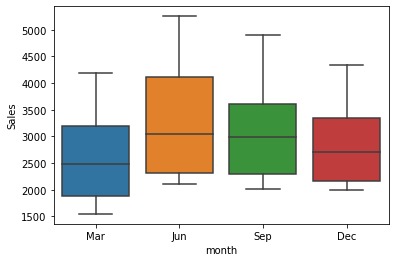

In [31]:
sns.boxplot(x="month",y="Sales",data=data)

In [32]:
# ACF

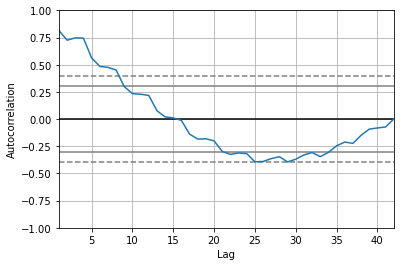

In [33]:
pd.plotting.autocorrelation_plot(data['Sales'])
plt.show()

In [34]:
# LAG plot

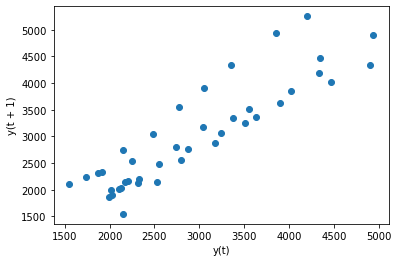

In [35]:
pd.plotting.lag_plot(data['Sales'])
plt.show()

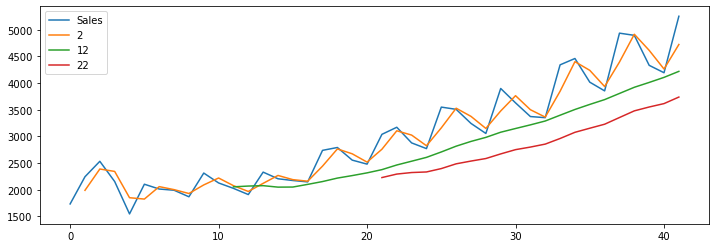

In [36]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="Sales")
for i in range(2,24,10):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

ARIMA

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model = ARIMA(data.Sales, order=(1,1,1))
model_fit = model.fit(disp=0)

K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   41
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -300.368
Method:                       css-mle   S.D. of innovations            364.467
Date:                Tue, 30 Nov 2021   AIC                            608.737
Time:                        11:41:58   BIC                            615.591
Sample:                             1   HQIC                           611.233
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            71.8688     16.223      4.430      0.000      40.073     103.664
ar.L1.D.Sales     0.1461      0.204      0.717      0.473      -0.253       0.545
ma.L1.D.Sales    -0.7786      0.117     -6.683      0.000      -1.007      -0.550
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            6.8457           +0.0000j            6.8457            0.0000
MA.1            1.2844           +0.0000j            1.2844            0.0000
-----------------------------------------------------------------------------
"""

In [40]:
residuals = pd.DataFrame(model_fit.resid)

In [41]:
rmse = np.mean((residuals)**2)**.5
print("rmse  :", rmse)

rmse  : 0    368.27328
dtype: float64


In [42]:
# Residual plot & Density of Residuals :

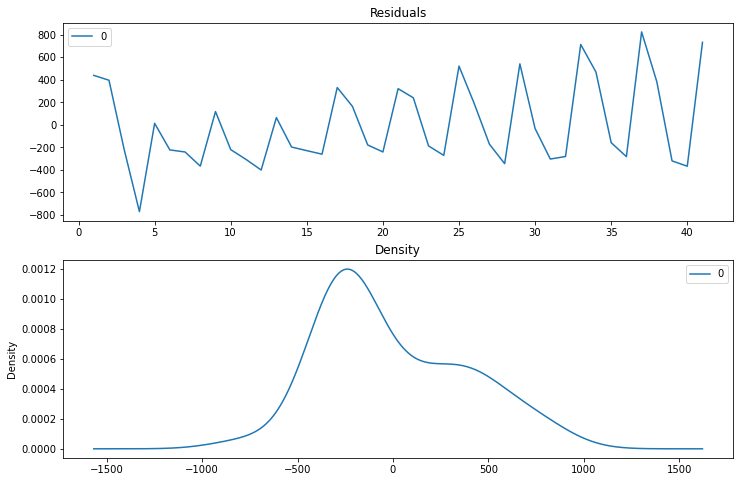

In [43]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [44]:
# prediction :

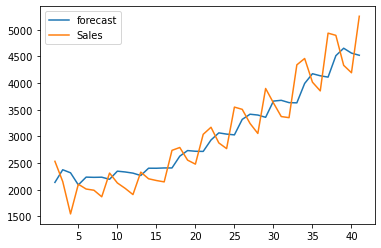

In [45]:
model_fit.plot_predict()
plt.show()

In [46]:
train = data.Sales[0:32]
test = data.Sales[32:]

In [47]:
# Model building

In [48]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
K:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated i

In [49]:
# forecasting sales value

In [50]:
forecast, se, conf = fitted.forecast(10, alpha=0.05)

In [51]:
# making series to form a graph

In [52]:
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [53]:
# Plot forecasting vs actual graph :

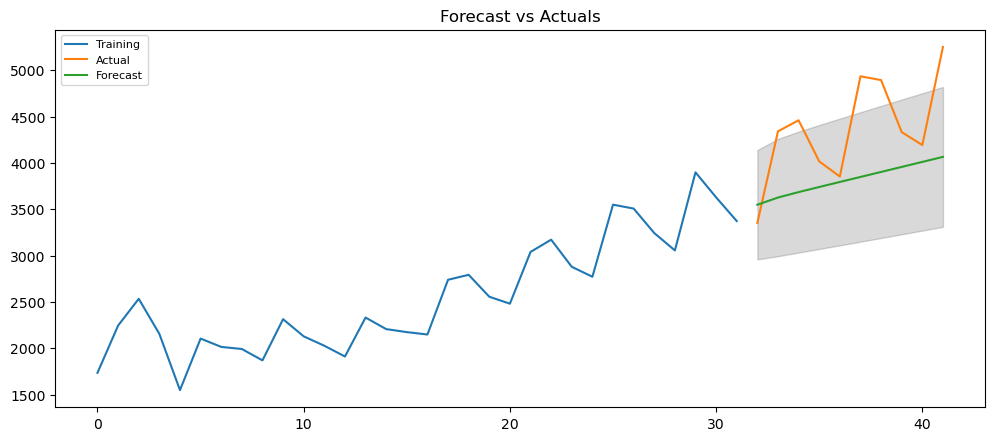

In [54]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [55]:
from statsmodels.tsa.stattools import acf

In [62]:
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

K:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
K:\anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'rmse': 705.5867470947466,
 'acf1': array([ 1.        , -0.14290113, -0.52514005,  0.14662923,  0.56077816,
        -0.28894781, -0.30713236,  0.10567409,  0.18853247, -0.2374926 ])}

SARIMA

In [57]:
import statsmodels.api as sm

In [58]:
mod = sm.tsa.SARIMAX(data["Sales"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

K:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -200.215
Date:                              Tue, 30 Nov 2021   AIC                            406.429
Time:                                      11:43:59   BIC                            410.531
Sample:                                           0   HQIC                           407.714
                                               - 42                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8582     22.793      0.038      0.970     -43.815      45.531
ma.S.L12      -0.88

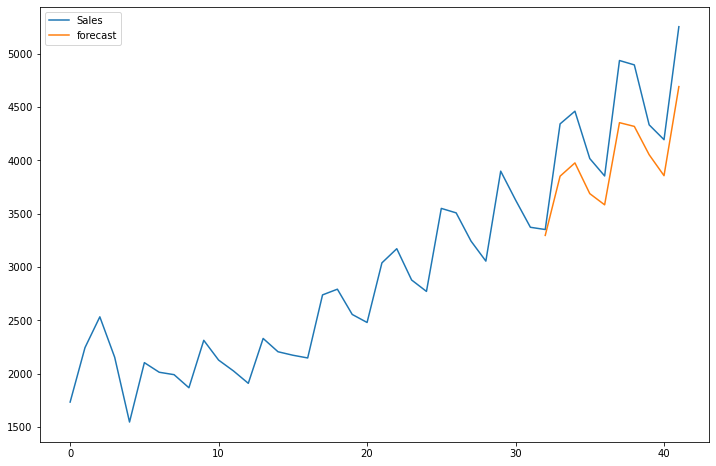

In [59]:
data['forecast'] = results.predict(start = 32, end=41 , dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [60]:
sarima_rmse = np.mean((results.resid)**2)**0.5
print("SARIMA model rmse :", sarima_rmse)

SARIMA model rmse : 412.31501015441313


In [63]:
# Therefor, after calculating rmse for different models we can conclude that ARIMA model with dispersion=0 and performing on whole
# Sales value gives us lesser rmse is good model compare to model with -1 dispersion and applying on training data.

In [64]:
# rmse from SARIMA model gives higher rmse compare to ARIMA.